In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   
%load_ext autoreload
%autoreload 1

Author: Andrew Tarzia

Date Created: 10 Oct 2018

Distributed under the terms of the MIT License.

# Notebook for plotting the results of reaction system screening

In [2]:
import pandas as pd
%aimport rdkit_functions
%aimport ellipsoid
%aimport plotting

In [3]:
import sys
from rxn_syst import reaction, yield_rxn_syst
from molecule import molecule
import glob
from plotting import *

#DB2do = 'biomin'
DB2do = 'new'

if DB2do == 'biomin':
    search_output_dir = '/home/atarzia/psp/screening_results/biomin_search/'
    plot_suffix = 'biomin'
elif DB2do == 'new':
    search_output_dir = '/home/atarzia/psp/screening_results/new_reactions/'
    plot_suffix = 'new'
molecule_db_dir = '/home/atarzia/psp/molecule_DBs/atarzia/'
molecules = glob.glob(molecule_db_dir+'ATRS_*.gpkl')
print('------------------------------------------------')
print('Doing DB:', DB2do)
print('------------------------------------------------')

------------------------------------------------
Doing DB: new
------------------------------------------------


In [4]:
# parameters
pI_thresh = 6
size_thresh = 4.2  # angstroms
print('settings:')
print('    pI threshold:', pI_thresh)
print('    Diffusion threshold:', size_thresh, 'Angstrom')

settings:
    pI threshold: 6
    Diffusion threshold: 4.2 Angstrom


## Extract all RS data into DataFrame for faster plotting

In [59]:
generator = yield_rxn_syst(search_output_dir)

data_list = []
count = 0
for rs in generator:
    count += 1
    if rs.skip_rxn is True:
        continue
    print('------', count, '------')
    row = [rs.pkl, rs.EC, rs.max_comp_size, rs.max_XlogP, rs.min_XlogP,
           rs.max_logP, rs.min_logP, rs.r_max_comp, rs.p_max_comp,
           rs.r_max_sa, rs.p_max_sa,
           rs.delta_comp, rs.delta_sa, rs.A_index, rs.GRAVY, rs.I_index, rs.pI]
    data_list.append(row)

------ 7 ------
------ 10 ------
------ 19 ------
------ 20 ------
------ 21 ------
------ 25 ------
------ 27 ------
------ 30 ------
------ 32 ------
------ 34 ------
------ 36 ------
------ 37 ------
------ 40 ------
------ 41 ------
------ 42 ------
------ 43 ------
------ 44 ------
------ 53 ------
------ 60 ------
------ 71 ------
------ 73 ------
------ 76 ------
------ 77 ------
------ 85 ------
------ 88 ------
------ 89 ------
------ 95 ------
------ 97 ------
------ 100 ------
------ 108 ------
------ 110 ------
------ 114 ------
------ 115 ------
------ 118 ------
------ 120 ------
------ 127 ------
------ 128 ------
------ 132 ------
------ 135 ------
------ 141 ------
------ 143 ------
------ 146 ------
------ 151 ------
------ 153 ------
------ 157 ------
------ 159 ------
------ 162 ------
------ 163 ------
------ 165 ------
------ 167 ------
------ 168 ------
------ 170 ------
------ 173 ------
------ 175 ------
------ 178 ------
------ 179 ------
------ 181 ------
---

------ 1442 ------
------ 1445 ------
------ 1447 ------
------ 1448 ------
------ 1457 ------
------ 1458 ------
------ 1462 ------
------ 1467 ------
------ 1470 ------
------ 1480 ------
------ 1481 ------
------ 1484 ------
------ 1490 ------
------ 1491 ------
------ 1494 ------
------ 1495 ------
------ 1499 ------
------ 1505 ------
------ 1506 ------
------ 1507 ------
------ 1508 ------
------ 1510 ------
------ 1512 ------
------ 1515 ------
------ 1517 ------
------ 1523 ------
------ 1533 ------
------ 1536 ------
------ 1541 ------
------ 1545 ------
------ 1555 ------
------ 1556 ------
------ 1558 ------
------ 1567 ------
------ 1568 ------
------ 1572 ------
------ 1581 ------
------ 1582 ------
------ 1585 ------
------ 1591 ------
------ 1593 ------
------ 1597 ------
------ 1600 ------
------ 1605 ------
------ 1610 ------
------ 1611 ------
------ 1615 ------
------ 1616 ------
------ 1617 ------
------ 1620 ------
------ 1623 ------
------ 1624 ------
------ 1629 

------ 2945 ------
------ 2949 ------
------ 2950 ------
------ 2955 ------
------ 2957 ------
------ 2959 ------
------ 2960 ------
------ 2964 ------
------ 2970 ------
------ 2971 ------
------ 2976 ------
------ 2985 ------
------ 2987 ------
------ 2993 ------
------ 2994 ------
------ 2996 ------
------ 2997 ------
------ 2999 ------
------ 3009 ------
------ 3016 ------
------ 3022 ------
------ 3025 ------
------ 3026 ------
------ 3028 ------
------ 3029 ------
------ 3030 ------
------ 3031 ------
------ 3042 ------
------ 3044 ------
------ 3045 ------
------ 3046 ------
------ 3048 ------
------ 3052 ------
------ 3053 ------
------ 3056 ------
------ 3059 ------
------ 3060 ------
------ 3061 ------
------ 3065 ------
------ 3070 ------
------ 3072 ------
------ 3074 ------
------ 3088 ------
------ 3089 ------
------ 3090 ------
------ 3092 ------
------ 3098 ------
------ 3099 ------
------ 3102 ------
------ 3103 ------
------ 3107 ------
------ 3108 ------
------ 3109 

------ 4448 ------
------ 4452 ------
------ 4455 ------
------ 4459 ------
------ 4461 ------
------ 4467 ------
------ 4471 ------
------ 4479 ------
------ 4481 ------
------ 4487 ------
------ 4489 ------
------ 4500 ------
------ 4501 ------
------ 4503 ------
------ 4504 ------
------ 4505 ------
------ 4508 ------
------ 4516 ------
------ 4518 ------
------ 4533 ------
------ 4534 ------
------ 4536 ------
------ 4537 ------
------ 4540 ------
------ 4545 ------
------ 4552 ------
------ 4554 ------
------ 4558 ------
------ 4563 ------
------ 4564 ------
------ 4567 ------
------ 4572 ------
------ 4580 ------
------ 4581 ------
------ 4586 ------
------ 4591 ------
------ 4592 ------
------ 4596 ------
------ 4597 ------
------ 4599 ------
------ 4601 ------
------ 4613 ------
------ 4621 ------
------ 4624 ------
------ 4636 ------
------ 4637 ------
------ 4639 ------
------ 4641 ------
------ 4644 ------
------ 4647 ------
------ 4651 ------
------ 4652 ------
------ 4653 

------ 6000 ------
------ 6004 ------
------ 6009 ------
------ 6011 ------
------ 6012 ------
------ 6014 ------
------ 6018 ------
------ 6020 ------
------ 6025 ------
------ 6026 ------
------ 6027 ------
------ 6029 ------
------ 6030 ------
------ 6032 ------
------ 6038 ------
------ 6042 ------
------ 6043 ------
------ 6053 ------
------ 6063 ------
------ 6071 ------
------ 6072 ------
------ 6075 ------
------ 6076 ------
------ 6077 ------
------ 6080 ------
------ 6085 ------
------ 6086 ------
------ 6087 ------
------ 6088 ------
------ 6093 ------
------ 6104 ------
------ 6107 ------
------ 6113 ------
------ 6114 ------
------ 6122 ------
------ 6127 ------
------ 6130 ------
------ 6131 ------
------ 6133 ------
------ 6138 ------
------ 6143 ------
------ 6154 ------
------ 6160 ------
------ 6165 ------
------ 6168 ------
------ 6169 ------
------ 6170 ------
------ 6176 ------
------ 6182 ------
------ 6184 ------
------ 6187 ------
------ 6191 ------
------ 6195 

------ 8880 ------
------ 8886 ------
------ 8890 ------
------ 8896 ------
------ 8905 ------
------ 8911 ------
------ 8913 ------
------ 8915 ------
------ 8916 ------
------ 8919 ------
------ 8923 ------
------ 8925 ------
------ 8926 ------
------ 8928 ------
------ 8929 ------
------ 8931 ------
------ 8936 ------
------ 8939 ------
------ 8941 ------
------ 8947 ------
------ 8952 ------
------ 8959 ------
------ 8965 ------
------ 8973 ------
------ 8974 ------
------ 8980 ------
------ 8982 ------
------ 8986 ------
------ 8991 ------
------ 8992 ------
------ 9008 ------
------ 9016 ------
------ 9024 ------
------ 9026 ------
------ 9027 ------
------ 9028 ------
------ 9033 ------
------ 9034 ------
------ 9035 ------
------ 9040 ------
------ 9043 ------
------ 9044 ------
------ 9045 ------
------ 9047 ------
------ 9049 ------
------ 9056 ------
------ 9057 ------
------ 9058 ------
------ 9061 ------
------ 9062 ------
------ 9063 ------
------ 9067 ------
------ 9070 

------ 10283 ------
------ 10287 ------
------ 10289 ------
------ 10299 ------
------ 10303 ------
------ 10304 ------
------ 10307 ------
------ 10309 ------
------ 10317 ------
------ 10318 ------
------ 10321 ------
------ 10326 ------
------ 10328 ------
------ 10329 ------
------ 10331 ------
------ 10341 ------
------ 10343 ------
------ 10344 ------
------ 10354 ------
------ 10356 ------
------ 10361 ------
------ 10366 ------
------ 10368 ------
------ 10371 ------
------ 10372 ------
------ 10373 ------
------ 10376 ------
------ 10379 ------
------ 10382 ------
------ 10386 ------
------ 10387 ------
------ 10394 ------
------ 10396 ------
------ 10401 ------
------ 10407 ------
------ 10411 ------
------ 10413 ------
------ 10414 ------
------ 10417 ------
------ 10421 ------
------ 10423 ------
------ 10428 ------
------ 10429 ------
------ 10436 ------
------ 10438 ------
------ 10440 ------
------ 10441 ------
------ 10442 ------
------ 10443 ------
------ 10445 ------


------ 11696 ------
------ 11699 ------
------ 11702 ------
------ 11703 ------
------ 11705 ------
------ 11707 ------
------ 11710 ------
------ 11713 ------
------ 11715 ------
------ 11718 ------
------ 11724 ------
------ 11726 ------
------ 11738 ------
------ 11739 ------
------ 11740 ------
------ 11741 ------
------ 11745 ------
------ 11747 ------
------ 11751 ------
------ 11753 ------
------ 11760 ------
------ 11761 ------
------ 11767 ------
------ 11769 ------
------ 11772 ------
------ 11777 ------
------ 11782 ------
------ 11784 ------
------ 11786 ------
------ 11790 ------
------ 11794 ------
------ 11800 ------
------ 11804 ------
------ 11806 ------
------ 11808 ------
------ 11810 ------
------ 11811 ------
------ 11817 ------
------ 11818 ------
------ 11820 ------
------ 11822 ------
------ 11825 ------
------ 11826 ------
------ 11827 ------
------ 11831 ------
------ 11835 ------
------ 11837 ------
------ 11839 ------
------ 11843 ------
------ 11847 ------


------ 13027 ------
------ 13028 ------
------ 13030 ------
------ 13031 ------
------ 13032 ------
------ 13033 ------
------ 13038 ------
------ 13042 ------
------ 13048 ------
------ 13056 ------
------ 13059 ------
------ 13060 ------
------ 13064 ------
------ 13065 ------
------ 13066 ------
------ 13067 ------
------ 13068 ------
------ 13071 ------
------ 13073 ------
------ 13079 ------
------ 13088 ------
------ 13091 ------
------ 13092 ------
------ 13101 ------
------ 13102 ------
------ 13105 ------
------ 13107 ------
------ 13109 ------
------ 13111 ------
------ 13118 ------
------ 13121 ------
------ 13124 ------
------ 13126 ------
------ 13132 ------
------ 13135 ------
------ 13136 ------
------ 13139 ------
------ 13140 ------
------ 13142 ------
------ 13143 ------
------ 13145 ------
------ 13147 ------
------ 13155 ------
------ 13156 ------
------ 13171 ------
------ 13172 ------
------ 13178 ------
------ 13184 ------
------ 13190 ------
------ 13197 ------


------ 14434 ------
------ 14436 ------
------ 14441 ------
------ 14446 ------
------ 14447 ------
------ 14452 ------
------ 14456 ------
------ 14460 ------
------ 14461 ------
------ 14463 ------
------ 14466 ------
------ 14471 ------
------ 14473 ------
------ 14476 ------
------ 14486 ------
------ 14494 ------
------ 14495 ------
------ 14499 ------
------ 14500 ------
------ 14504 ------
------ 14505 ------
------ 14507 ------
------ 14509 ------
------ 14513 ------
------ 14515 ------
------ 14517 ------
------ 14527 ------
------ 14534 ------
------ 14537 ------
------ 14542 ------
------ 14543 ------
------ 14544 ------
------ 14546 ------
------ 14547 ------
------ 14549 ------
------ 14551 ------
------ 14553 ------
------ 14562 ------
------ 14563 ------
------ 14571 ------
------ 14575 ------
------ 14580 ------
------ 14590 ------
------ 14593 ------
------ 14596 ------
------ 14600 ------
------ 14603 ------
------ 14604 ------
------ 14605 ------
------ 14608 ------


------ 15759 ------
------ 15763 ------
------ 15766 ------
------ 15778 ------
------ 15779 ------
------ 15782 ------
------ 15790 ------
------ 15794 ------
------ 15800 ------
------ 15805 ------
------ 15808 ------
------ 15812 ------
------ 15813 ------
------ 15816 ------
------ 15823 ------
------ 15824 ------
------ 15825 ------
------ 15827 ------
------ 15831 ------
------ 15835 ------
------ 15836 ------
------ 15839 ------
------ 15842 ------
------ 15846 ------
------ 15849 ------
------ 15850 ------
------ 15856 ------
------ 15857 ------
------ 15858 ------
------ 15859 ------
------ 15868 ------
------ 15869 ------
------ 15874 ------
------ 15876 ------
------ 15878 ------
------ 15883 ------
------ 15884 ------
------ 15888 ------
------ 15897 ------
------ 15898 ------
------ 15900 ------
------ 15902 ------
------ 15904 ------
------ 15905 ------
------ 15906 ------
------ 15910 ------
------ 15911 ------
------ 15923 ------
------ 15926 ------
------ 15927 ------


------ 17227 ------
------ 17230 ------
------ 17234 ------
------ 17235 ------
------ 17241 ------
------ 17243 ------
------ 17250 ------
------ 17251 ------
------ 17254 ------
------ 17256 ------
------ 17257 ------
------ 17260 ------
------ 17262 ------
------ 17263 ------
------ 17264 ------
------ 17271 ------
------ 17273 ------
------ 17274 ------
------ 17276 ------
------ 17277 ------
------ 17278 ------
------ 17288 ------
------ 17289 ------
------ 17290 ------
------ 17292 ------
------ 17296 ------
------ 17300 ------
------ 17303 ------
------ 17310 ------
------ 17311 ------
------ 17320 ------
------ 17322 ------
------ 17323 ------
------ 17325 ------
------ 17328 ------
------ 17330 ------
------ 17334 ------
------ 17335 ------
------ 17343 ------
------ 17347 ------
------ 17349 ------
------ 17350 ------
------ 17354 ------
------ 17360 ------
------ 17365 ------
------ 17369 ------
------ 17370 ------
------ 17373 ------
------ 17375 ------
------ 17377 ------


------ 18571 ------
------ 18574 ------
------ 18580 ------
------ 18590 ------
------ 18591 ------
------ 18592 ------
------ 18593 ------
------ 18595 ------
------ 18597 ------
------ 18598 ------
------ 18599 ------
------ 18602 ------
------ 18608 ------
------ 18609 ------
------ 18611 ------
------ 18614 ------
------ 18615 ------
------ 18620 ------
------ 18637 ------
------ 18638 ------
------ 18641 ------
------ 18647 ------
------ 18659 ------
------ 18660 ------
------ 18661 ------
------ 18666 ------
------ 18670 ------
------ 18672 ------
------ 18679 ------
------ 18680 ------
------ 18682 ------
------ 18686 ------
------ 18691 ------
------ 18693 ------
------ 18696 ------
------ 18700 ------
------ 18705 ------
------ 18706 ------
------ 18715 ------
------ 18717 ------
------ 18719 ------
------ 18726 ------
------ 18735 ------
------ 18736 ------
------ 18740 ------
------ 18743 ------
------ 18745 ------
------ 18748 ------
------ 18750 ------
------ 18758 ------


------ 20000 ------
------ 20015 ------
------ 20017 ------
------ 20019 ------
------ 20033 ------
------ 20042 ------
------ 20047 ------
------ 20050 ------
------ 20052 ------
------ 20053 ------
------ 20056 ------
------ 20059 ------
------ 20061 ------
------ 20066 ------
------ 20067 ------
------ 20069 ------
------ 20072 ------
------ 20077 ------
------ 20079 ------
------ 20080 ------
------ 20083 ------
------ 20089 ------
------ 20090 ------
------ 20093 ------
------ 20099 ------
------ 20100 ------
------ 20106 ------
------ 20116 ------
------ 20119 ------
------ 20121 ------
------ 20122 ------
------ 20123 ------
------ 20126 ------
------ 20131 ------
------ 20134 ------
------ 20153 ------
------ 20154 ------
------ 20155 ------
------ 20158 ------
------ 20159 ------
------ 20162 ------
------ 20164 ------
------ 20165 ------
------ 20167 ------
------ 20168 ------
------ 20171 ------
------ 20180 ------
------ 20185 ------
------ 20199 ------
------ 20202 ------


------ 21516 ------
------ 21520 ------
------ 21528 ------
------ 21529 ------
------ 21531 ------
------ 21535 ------
------ 21540 ------
------ 21544 ------
------ 21547 ------
------ 21549 ------
------ 21551 ------
------ 21553 ------
------ 21558 ------
------ 21561 ------
------ 21562 ------
------ 21566 ------
------ 21569 ------
------ 21577 ------
------ 21578 ------
------ 21579 ------
------ 21581 ------
------ 21582 ------
------ 21584 ------
------ 21590 ------
------ 21591 ------
------ 21592 ------
------ 21593 ------
------ 21594 ------
------ 21598 ------
------ 21599 ------
------ 21602 ------
------ 21603 ------
------ 21607 ------
------ 21609 ------
------ 21613 ------
------ 21616 ------
------ 21617 ------
------ 21620 ------
------ 21621 ------
------ 21623 ------
------ 21629 ------
------ 21630 ------
------ 21633 ------
------ 21634 ------
------ 21636 ------
------ 21638 ------
------ 21640 ------
------ 21643 ------
------ 21644 ------
------ 21648 ------


------ 22842 ------
------ 22843 ------
------ 22859 ------
------ 22860 ------
------ 22863 ------
------ 22871 ------
------ 22874 ------
------ 22886 ------
------ 22889 ------
------ 22890 ------
------ 22891 ------
------ 22894 ------
------ 22906 ------
------ 22918 ------
------ 22920 ------
------ 22924 ------
------ 22928 ------
------ 22934 ------
------ 22937 ------
------ 22948 ------
------ 22951 ------
------ 22954 ------
------ 22958 ------
------ 22959 ------
------ 22966 ------
------ 22970 ------
------ 22972 ------
------ 22973 ------
------ 22977 ------
------ 22980 ------
------ 22982 ------
------ 22985 ------
------ 22988 ------
------ 22993 ------
------ 23003 ------
------ 23007 ------
------ 23012 ------
------ 23015 ------
------ 23016 ------
------ 23019 ------
------ 23028 ------
------ 23029 ------
------ 23030 ------
------ 23033 ------
------ 23036 ------
------ 23038 ------
------ 23039 ------
------ 23040 ------
------ 23044 ------
------ 23048 ------


------ 24238 ------
------ 24240 ------
------ 24241 ------
------ 24243 ------
------ 24244 ------
------ 24247 ------
------ 24249 ------
------ 24255 ------
------ 24257 ------
------ 24260 ------
------ 24261 ------
------ 24262 ------
------ 24263 ------
------ 24264 ------
------ 24271 ------
------ 24274 ------
------ 24276 ------
------ 24279 ------
------ 24281 ------
------ 24282 ------
------ 24283 ------
------ 24292 ------
------ 24295 ------
------ 24298 ------
------ 24300 ------
------ 24307 ------
------ 24308 ------
------ 24313 ------
------ 24314 ------
------ 24315 ------
------ 24316 ------
------ 24320 ------
------ 24321 ------
------ 24322 ------
------ 24325 ------
------ 24327 ------
------ 24329 ------
------ 24330 ------
------ 24333 ------
------ 24334 ------
------ 24336 ------
------ 24341 ------
------ 24342 ------
------ 24353 ------
------ 24355 ------
------ 24357 ------
------ 24359 ------
------ 24360 ------
------ 24362 ------
------ 24363 ------


------ 25597 ------
------ 25603 ------
------ 25605 ------
------ 25615 ------
------ 25616 ------
------ 25618 ------
------ 25620 ------
------ 25623 ------
------ 25630 ------
------ 25637 ------
------ 25638 ------
------ 25640 ------
------ 25642 ------
------ 25655 ------
------ 25656 ------
------ 25657 ------
------ 25659 ------
------ 25661 ------
------ 25672 ------
------ 25674 ------
------ 25676 ------
------ 25677 ------
------ 25680 ------
------ 25681 ------
------ 25684 ------
------ 25685 ------
------ 25687 ------
------ 25689 ------
------ 25693 ------
------ 25694 ------
------ 25695 ------
------ 25696 ------
------ 25699 ------
------ 25701 ------
------ 25704 ------
------ 25705 ------
------ 25711 ------
------ 25713 ------
------ 25716 ------
------ 25724 ------
------ 25725 ------
------ 25726 ------
------ 25731 ------
------ 25732 ------
------ 25735 ------
------ 25736 ------
------ 25742 ------
------ 25746 ------
------ 25748 ------
------ 25749 ------


------ 26964 ------
------ 26966 ------
------ 26974 ------
------ 26979 ------
------ 26980 ------
------ 26988 ------
------ 26997 ------
------ 26999 ------
------ 27002 ------
------ 27011 ------
------ 27012 ------
------ 27016 ------
------ 27028 ------
------ 27030 ------
------ 27034 ------
------ 27035 ------
------ 27038 ------
------ 27051 ------
------ 27055 ------
------ 27060 ------
------ 27061 ------
------ 27062 ------
------ 27068 ------
------ 27071 ------
------ 27076 ------
------ 27079 ------
------ 27081 ------
------ 27087 ------
------ 27090 ------
------ 27094 ------
------ 27100 ------
------ 27102 ------
------ 27103 ------
------ 27107 ------
------ 27109 ------
------ 27111 ------
------ 27113 ------
------ 27114 ------
------ 27115 ------
------ 27118 ------
------ 27121 ------
------ 27124 ------
------ 27128 ------
------ 27134 ------
------ 27136 ------
------ 27138 ------
------ 27140 ------
------ 27141 ------
------ 27147 ------
------ 27148 ------


------ 28405 ------
------ 28408 ------
------ 28411 ------
------ 28417 ------
------ 28421 ------
------ 28423 ------
------ 28425 ------
------ 28427 ------
------ 28437 ------
------ 28442 ------
------ 28444 ------
------ 28445 ------
------ 28448 ------
------ 28449 ------
------ 28463 ------
------ 28466 ------
------ 28470 ------
------ 28471 ------
------ 28477 ------
------ 28486 ------
------ 28487 ------
------ 28490 ------
------ 28492 ------
------ 28493 ------
------ 28497 ------
------ 28498 ------
------ 28502 ------
------ 28503 ------
------ 28504 ------
------ 28505 ------
------ 28506 ------
------ 28519 ------
------ 28520 ------
------ 28528 ------
------ 28531 ------
------ 28535 ------
------ 28538 ------
------ 28539 ------
------ 28541 ------
------ 28545 ------
------ 28561 ------
------ 28563 ------
------ 28569 ------
------ 28571 ------
------ 28588 ------
------ 28590 ------
------ 28592 ------
------ 28595 ------
------ 28599 ------
------ 28606 ------


------ 29817 ------
------ 29824 ------
------ 29828 ------
------ 29837 ------
------ 29838 ------
------ 29840 ------
------ 29842 ------
------ 29851 ------
------ 29854 ------
------ 29858 ------
------ 29864 ------
------ 29869 ------
------ 29870 ------
------ 29872 ------
------ 29873 ------
------ 29878 ------
------ 29883 ------
------ 29884 ------
------ 29888 ------
------ 29892 ------
------ 29901 ------
------ 29905 ------
------ 29908 ------
------ 29910 ------
------ 29912 ------
------ 29923 ------
------ 29924 ------
------ 29932 ------
------ 29939 ------
------ 29944 ------
------ 29956 ------
------ 29960 ------
------ 29964 ------
------ 29966 ------
------ 29968 ------
------ 29978 ------
------ 29980 ------
------ 29981 ------
------ 29982 ------
------ 29986 ------
------ 29990 ------
------ 30003 ------
------ 30010 ------
------ 30013 ------
------ 30015 ------
------ 30017 ------
------ 30019 ------
------ 30028 ------
------ 30030 ------
------ 30031 ------


------ 31203 ------
------ 31204 ------
------ 31210 ------
------ 31214 ------
------ 31216 ------
------ 31218 ------
------ 31219 ------
------ 31225 ------
------ 31232 ------
------ 31233 ------
------ 31234 ------
------ 31237 ------
------ 31239 ------
------ 31244 ------
------ 31246 ------
------ 31247 ------
------ 31249 ------
------ 31250 ------
------ 31254 ------
------ 31258 ------
------ 31259 ------
------ 31262 ------
------ 31267 ------
------ 31268 ------
------ 31270 ------
------ 31273 ------
------ 31278 ------
------ 31279 ------
------ 31280 ------
------ 31281 ------
------ 31282 ------
------ 31284 ------
------ 31291 ------
------ 31294 ------
------ 31299 ------
------ 31301 ------
------ 31303 ------
------ 31304 ------
------ 31306 ------
------ 31315 ------
------ 31316 ------
------ 31317 ------
------ 31322 ------
------ 31323 ------
------ 31325 ------
------ 31326 ------
------ 31328 ------
------ 31329 ------
------ 31332 ------
------ 31335 ------


------ 32645 ------
------ 32647 ------
------ 32649 ------
------ 32651 ------
------ 32654 ------
------ 32656 ------
------ 32657 ------
------ 32658 ------
------ 32659 ------
------ 32660 ------
------ 32663 ------
------ 32667 ------
------ 32668 ------
------ 32671 ------
------ 32675 ------
------ 32678 ------
------ 32679 ------
------ 32680 ------
------ 32684 ------
------ 32685 ------
------ 32686 ------
------ 32692 ------
------ 32699 ------
------ 32701 ------
------ 32702 ------
------ 32705 ------
------ 32706 ------
------ 32709 ------
------ 32711 ------
------ 32713 ------
------ 32721 ------
------ 32722 ------
------ 32723 ------
------ 32727 ------
------ 32728 ------
------ 32729 ------
------ 32733 ------
------ 32736 ------
------ 32741 ------
------ 32742 ------
------ 32746 ------
------ 32755 ------
------ 32757 ------
------ 32758 ------
------ 32760 ------
------ 32763 ------
------ 32772 ------
------ 32777 ------
------ 32778 ------
------ 32785 ------


------ 33935 ------
------ 33937 ------
------ 33939 ------
------ 33941 ------
------ 33946 ------
------ 33947 ------
------ 33948 ------
------ 33953 ------
------ 33954 ------
------ 33956 ------
------ 33957 ------
------ 33959 ------
------ 33963 ------
------ 33967 ------
------ 33973 ------
------ 33974 ------
------ 33979 ------
------ 33980 ------
------ 33982 ------
------ 33987 ------
------ 33990 ------
------ 33994 ------
------ 34000 ------
------ 34003 ------
------ 34007 ------
------ 34010 ------
------ 34013 ------
------ 34015 ------
------ 34016 ------
------ 34017 ------
------ 34022 ------
------ 34023 ------
------ 34029 ------
------ 34042 ------
------ 34044 ------
------ 34045 ------
------ 34046 ------
------ 34048 ------
------ 34050 ------
------ 34055 ------
------ 34056 ------
------ 34059 ------
------ 34069 ------
------ 34071 ------
------ 34073 ------
------ 34074 ------
------ 34075 ------
------ 34076 ------
------ 34077 ------
------ 34082 ------


------ 35302 ------
------ 35304 ------
------ 35305 ------
------ 35310 ------
------ 35311 ------
------ 35314 ------
------ 35315 ------
------ 35316 ------
------ 35321 ------
------ 35323 ------
------ 35325 ------
------ 35332 ------
------ 35334 ------
------ 35335 ------
------ 35336 ------
------ 35337 ------
------ 35341 ------
------ 35342 ------
------ 35355 ------
------ 35359 ------
------ 35363 ------
------ 35368 ------
------ 35369 ------
------ 35370 ------
------ 35374 ------
------ 35377 ------
------ 35386 ------
------ 35389 ------
------ 35393 ------
------ 35394 ------
------ 35397 ------
------ 35398 ------
------ 35399 ------
------ 35404 ------
------ 35405 ------
------ 35426 ------
------ 35432 ------
------ 35433 ------
------ 35446 ------
------ 35451 ------
------ 35459 ------
------ 35460 ------
------ 35461 ------
------ 35466 ------
------ 35468 ------
------ 35478 ------
------ 35479 ------
------ 35483 ------
------ 35491 ------
------ 35495 ------


------ 36810 ------
------ 36812 ------
------ 36815 ------
------ 36818 ------
------ 36824 ------
------ 36827 ------
------ 36829 ------
------ 36831 ------
------ 36847 ------
------ 36851 ------
------ 36856 ------
------ 36859 ------
------ 36862 ------
------ 36863 ------
------ 36865 ------
------ 36867 ------
------ 36868 ------
------ 36875 ------
------ 36879 ------
------ 36886 ------
------ 36896 ------
------ 36898 ------
------ 36901 ------
------ 36904 ------
------ 36905 ------
------ 36906 ------
------ 36907 ------
------ 36914 ------
------ 36919 ------
------ 36920 ------
------ 36926 ------
------ 36930 ------
------ 36933 ------
------ 36935 ------
------ 36937 ------
------ 36941 ------
------ 36943 ------
------ 36945 ------
------ 36950 ------
------ 36959 ------
------ 36962 ------
------ 36963 ------
------ 36971 ------
------ 36973 ------
------ 36975 ------
------ 36979 ------
------ 36982 ------
------ 36983 ------
------ 36985 ------
------ 36986 ------


------ 38239 ------
------ 38241 ------
------ 38243 ------
------ 38245 ------
------ 38246 ------
------ 38248 ------
------ 38249 ------
------ 38250 ------
------ 38252 ------
------ 38256 ------
------ 38257 ------
------ 38264 ------
------ 38265 ------
------ 38266 ------
------ 38270 ------
------ 38272 ------
------ 38273 ------
------ 38277 ------
------ 38283 ------
------ 38288 ------
------ 38289 ------
------ 38291 ------
------ 38293 ------
------ 38295 ------
------ 38301 ------
------ 38304 ------
------ 38305 ------
------ 38308 ------
------ 38310 ------
------ 38311 ------
------ 38312 ------
------ 38320 ------
------ 38321 ------
------ 38322 ------
------ 38324 ------
------ 38325 ------
------ 38328 ------
------ 38332 ------
------ 38335 ------
------ 38336 ------
------ 38339 ------
------ 38343 ------
------ 38345 ------
------ 38346 ------
------ 38347 ------
------ 38351 ------
------ 38366 ------
------ 38369 ------
------ 38370 ------
------ 38375 ------


------ 39672 ------
------ 39674 ------
------ 39676 ------
------ 39677 ------
------ 39678 ------
------ 39680 ------
------ 39684 ------
------ 39685 ------
------ 39687 ------
------ 39690 ------
------ 39700 ------
------ 39702 ------
------ 39704 ------
------ 39705 ------
------ 39710 ------
------ 39714 ------
------ 39718 ------
------ 39725 ------
------ 39726 ------
------ 39734 ------
------ 39735 ------
------ 39740 ------
------ 39743 ------
------ 39754 ------
------ 39761 ------
------ 39762 ------
------ 39765 ------
------ 39766 ------
------ 39774 ------
------ 39782 ------
------ 39789 ------
------ 39790 ------
------ 39794 ------
------ 39795 ------
------ 39796 ------
------ 39797 ------
------ 39799 ------
------ 39804 ------
------ 39808 ------
------ 39816 ------
------ 39817 ------
------ 39820 ------
------ 39831 ------
------ 39841 ------
------ 39843 ------
------ 39844 ------
------ 39849 ------
------ 39850 ------
------ 39855 ------
------ 39860 ------


------ 41224 ------
------ 41230 ------
------ 41234 ------
------ 41237 ------
------ 41238 ------
------ 41250 ------
------ 41252 ------
------ 41259 ------
------ 41263 ------
------ 41268 ------
------ 41270 ------
------ 41273 ------
------ 41276 ------
------ 41281 ------
------ 41282 ------
------ 41287 ------
------ 41289 ------
------ 41290 ------
------ 41294 ------
------ 41299 ------
------ 41303 ------
------ 41308 ------
------ 41310 ------
------ 41312 ------
------ 41319 ------
------ 41322 ------
------ 41324 ------
------ 41325 ------
------ 41327 ------
------ 41328 ------
------ 41335 ------
------ 41347 ------
------ 41351 ------
------ 41352 ------
------ 41353 ------
------ 41354 ------
------ 41357 ------
------ 41359 ------
------ 41363 ------
------ 41369 ------
------ 41372 ------
------ 41373 ------
------ 41374 ------
------ 41376 ------
------ 41379 ------
------ 41380 ------
------ 41385 ------
------ 41390 ------
------ 41391 ------
------ 41393 ------


------ 42632 ------
------ 42636 ------
------ 42637 ------
------ 42644 ------
------ 42652 ------
------ 42656 ------
------ 42659 ------
------ 42660 ------
------ 42663 ------
------ 42665 ------
------ 42667 ------
------ 42669 ------
------ 42670 ------
------ 42679 ------
------ 42681 ------
------ 42682 ------
------ 42684 ------
------ 42685 ------
------ 42686 ------
------ 42691 ------
------ 42696 ------
------ 42703 ------
------ 42711 ------
------ 42712 ------
------ 42718 ------
------ 42720 ------
------ 42723 ------
------ 42727 ------
------ 42730 ------
------ 42733 ------
------ 42735 ------
------ 42736 ------
------ 42738 ------
------ 42741 ------
------ 42743 ------
------ 42744 ------
------ 42750 ------
------ 42751 ------
------ 42752 ------
------ 42757 ------
------ 42763 ------
------ 42764 ------
------ 42766 ------
------ 42769 ------
------ 42770 ------
------ 42771 ------
------ 42775 ------
------ 42780 ------
------ 42788 ------
------ 42793 ------


------ 44028 ------
------ 44033 ------
------ 44034 ------
------ 44035 ------
------ 44037 ------
------ 44039 ------
------ 44040 ------
------ 44043 ------
------ 44048 ------
------ 44057 ------
------ 44059 ------
------ 44064 ------
------ 44069 ------
------ 44078 ------
------ 44081 ------
------ 44084 ------
------ 44085 ------
------ 44087 ------
------ 44091 ------
------ 44093 ------
------ 44096 ------
------ 44100 ------
------ 44103 ------
------ 44110 ------
------ 44111 ------
------ 44112 ------
------ 44114 ------
------ 44118 ------
------ 44122 ------
------ 44131 ------
------ 44137 ------
------ 44138 ------
------ 44139 ------
------ 44141 ------
------ 44142 ------
------ 44147 ------
------ 44148 ------
------ 44153 ------
------ 44164 ------
------ 44165 ------
------ 44166 ------
------ 44167 ------
------ 44173 ------
------ 44174 ------
------ 44175 ------
------ 44180 ------
------ 44186 ------
------ 44187 ------
------ 44189 ------
------ 44192 ------


------ 45438 ------
------ 45441 ------
------ 45442 ------
------ 45445 ------
------ 45446 ------
------ 45447 ------
------ 45449 ------
------ 45450 ------
------ 45453 ------
------ 45457 ------
------ 45458 ------
------ 45466 ------
------ 45467 ------
------ 45470 ------
------ 45473 ------
------ 45482 ------
------ 45483 ------
------ 45484 ------
------ 45487 ------
------ 45488 ------
------ 45501 ------
------ 45505 ------
------ 45509 ------
------ 45512 ------
------ 45513 ------
------ 45524 ------
------ 45525 ------
------ 45526 ------
------ 45528 ------
------ 45530 ------
------ 45531 ------
------ 45535 ------
------ 45539 ------
------ 45543 ------
------ 45544 ------
------ 45546 ------
------ 45548 ------
------ 45551 ------
------ 45552 ------
------ 45555 ------
------ 45564 ------
------ 45569 ------
------ 45575 ------
------ 45578 ------
------ 45586 ------
------ 45587 ------
------ 45594 ------
------ 45597 ------
------ 45601 ------
------ 45609 ------


------ 46865 ------
------ 46869 ------
------ 46870 ------
------ 46878 ------
------ 46882 ------
------ 46887 ------
------ 46888 ------
------ 46889 ------
------ 46893 ------
------ 46895 ------
------ 46898 ------
------ 46901 ------
------ 46903 ------
------ 46905 ------
------ 46906 ------
------ 46908 ------
------ 46919 ------
------ 46923 ------
------ 46925 ------
------ 46929 ------
------ 46936 ------
------ 46938 ------
------ 46944 ------
------ 46947 ------
------ 46949 ------
------ 46950 ------
------ 46952 ------
------ 46968 ------
------ 46970 ------
------ 46972 ------
------ 46979 ------
------ 46982 ------
------ 46985 ------
------ 46986 ------
------ 46988 ------
------ 46989 ------
------ 46993 ------
------ 46998 ------
------ 47004 ------
------ 47005 ------
------ 47010 ------
------ 47014 ------
------ 47017 ------
------ 47019 ------
------ 47022 ------
------ 47040 ------
------ 47044 ------
------ 47046 ------
------ 47048 ------
------ 47057 ------


------ 48241 ------
------ 48242 ------
------ 48245 ------
------ 48246 ------
------ 48248 ------
------ 48249 ------
------ 48252 ------
------ 48256 ------
------ 48260 ------
------ 48263 ------
------ 48264 ------
------ 48268 ------
------ 48272 ------
------ 48275 ------
------ 48276 ------
------ 48278 ------
------ 48279 ------
------ 48281 ------
------ 48283 ------
------ 48285 ------
------ 48286 ------
------ 48290 ------
------ 48292 ------
------ 48293 ------
------ 48301 ------
------ 48302 ------
------ 48304 ------
------ 48305 ------
------ 48308 ------
------ 48309 ------
------ 48317 ------
------ 48318 ------
------ 48325 ------
------ 48329 ------
------ 48331 ------
------ 48333 ------
------ 48339 ------
------ 48343 ------
------ 48347 ------
------ 48351 ------
------ 48352 ------
------ 48353 ------
------ 48355 ------
------ 48357 ------
------ 48358 ------
------ 48360 ------
------ 48364 ------
------ 48369 ------
------ 48382 ------
------ 48387 ------


------ 49594 ------
------ 49596 ------
------ 49597 ------
------ 49599 ------
------ 49605 ------
------ 49607 ------
------ 49611 ------
------ 49613 ------
------ 49614 ------
------ 49616 ------
------ 49617 ------
------ 49619 ------
------ 49621 ------
------ 49622 ------
------ 49626 ------
------ 49633 ------
------ 49638 ------
------ 49640 ------
------ 49641 ------
------ 49649 ------
------ 49653 ------
------ 49655 ------
------ 49656 ------
------ 49657 ------
------ 49659 ------
------ 49660 ------
------ 49661 ------
------ 49662 ------
------ 49664 ------
------ 49674 ------
------ 49677 ------
------ 49679 ------
------ 49681 ------
------ 49683 ------
------ 49685 ------
------ 49686 ------
------ 49694 ------
------ 49695 ------
------ 49701 ------
------ 49712 ------
------ 49717 ------
------ 49722 ------
------ 49723 ------
------ 49724 ------
------ 49728 ------
------ 49736 ------
------ 49739 ------
------ 49743 ------
------ 49745 ------
------ 49747 ------


------ 51008 ------
------ 51011 ------
------ 51012 ------
------ 51015 ------
------ 51018 ------
------ 51020 ------
------ 51027 ------
------ 51028 ------
------ 51034 ------
------ 51038 ------
------ 51042 ------
------ 51045 ------
------ 51047 ------
------ 51050 ------
------ 51051 ------
------ 51054 ------
------ 51056 ------
------ 51059 ------
------ 51060 ------
------ 51064 ------
------ 51068 ------
------ 51069 ------
------ 51070 ------
------ 51075 ------
------ 51081 ------
------ 51084 ------
------ 51085 ------
------ 51088 ------
------ 51090 ------
------ 51093 ------
------ 51096 ------
------ 51098 ------
------ 51100 ------
------ 51101 ------
------ 51103 ------
------ 51106 ------
------ 51108 ------
------ 51109 ------
------ 51116 ------
------ 51119 ------
------ 51122 ------
------ 51124 ------
------ 51132 ------
------ 51138 ------
------ 51139 ------
------ 51141 ------
------ 51144 ------
------ 51146 ------
------ 51148 ------
------ 51152 ------


------ 52431 ------
------ 52436 ------
------ 52437 ------
------ 52444 ------
------ 52446 ------
------ 52448 ------
------ 52451 ------
------ 52456 ------
------ 52458 ------
------ 52460 ------
------ 52461 ------
------ 52462 ------
------ 52465 ------
------ 52468 ------
------ 52471 ------
------ 52472 ------
------ 52473 ------
------ 52474 ------
------ 52476 ------
------ 52477 ------
------ 52480 ------
------ 52482 ------
------ 52484 ------
------ 52486 ------
------ 52489 ------
------ 52490 ------
------ 52499 ------
------ 52501 ------
------ 52503 ------
------ 52504 ------
------ 52506 ------
------ 52507 ------
------ 52513 ------
------ 52515 ------
------ 52522 ------
------ 52529 ------
------ 52530 ------
------ 52535 ------
------ 52537 ------
------ 52545 ------
------ 52547 ------
------ 52548 ------
------ 52554 ------
------ 52558 ------
------ 52559 ------
------ 52561 ------
------ 52562 ------
------ 52563 ------
------ 52566 ------
------ 52567 ------


------ 53843 ------
------ 53845 ------
------ 53846 ------
------ 53848 ------
------ 53850 ------
------ 53855 ------
------ 53857 ------
------ 53869 ------
------ 53873 ------
------ 53874 ------
------ 53877 ------
------ 53878 ------
------ 53880 ------
------ 53882 ------
------ 53887 ------
------ 53889 ------
------ 53893 ------
------ 53895 ------
------ 53900 ------
------ 53902 ------
------ 53910 ------
------ 53918 ------
------ 53920 ------
------ 53922 ------
------ 53923 ------
------ 53931 ------
------ 53932 ------
------ 53933 ------
------ 53934 ------
------ 53938 ------
------ 53946 ------
------ 53948 ------
------ 53955 ------
------ 53957 ------
------ 53959 ------
------ 53960 ------
------ 53961 ------
------ 53963 ------
------ 53966 ------
------ 53968 ------
------ 53972 ------
------ 53974 ------
------ 53977 ------
------ 53978 ------
------ 53979 ------
------ 53981 ------
------ 53982 ------
------ 53983 ------
------ 53986 ------
------ 53987 ------


------ 55204 ------
------ 55210 ------
------ 55226 ------
------ 55229 ------
------ 55230 ------
------ 55231 ------
------ 55237 ------
------ 55240 ------
------ 55241 ------
------ 55242 ------
------ 55247 ------
------ 55250 ------
------ 55257 ------
------ 55259 ------
------ 55261 ------
------ 55266 ------
------ 55269 ------
------ 55271 ------
------ 55272 ------
------ 55277 ------
------ 55278 ------
------ 55282 ------
------ 55285 ------
------ 55290 ------
------ 55292 ------
------ 55294 ------
------ 55303 ------
------ 55313 ------
------ 55314 ------
------ 55318 ------
------ 55320 ------
------ 55323 ------
------ 55325 ------
------ 55330 ------
------ 55339 ------
------ 55343 ------
------ 55345 ------
------ 55353 ------
------ 55355 ------
------ 55362 ------
------ 55363 ------
------ 55364 ------
------ 55366 ------
------ 55369 ------
------ 55373 ------
------ 55380 ------
------ 55383 ------
------ 55385 ------
------ 55390 ------
------ 55401 ------


------ 56574 ------
------ 56575 ------
------ 56588 ------
------ 56590 ------
------ 56600 ------
------ 56602 ------
------ 56605 ------
------ 56606 ------
------ 56607 ------
------ 56608 ------
------ 56627 ------
------ 56629 ------
------ 56631 ------
------ 56632 ------
------ 56634 ------
------ 56638 ------
------ 56649 ------
------ 56655 ------
------ 56662 ------
------ 56668 ------
------ 56670 ------
------ 56672 ------
------ 56673 ------
------ 56674 ------
------ 56676 ------
------ 56677 ------
------ 56678 ------
------ 56681 ------
------ 56682 ------
------ 56687 ------
------ 56689 ------
------ 56699 ------
------ 56700 ------
------ 56701 ------
------ 56703 ------
------ 56706 ------
------ 56709 ------
------ 56714 ------
------ 56715 ------
------ 56719 ------
------ 56724 ------
------ 56729 ------
------ 56731 ------
------ 56733 ------
------ 56734 ------
------ 56738 ------
------ 56741 ------
------ 56742 ------
------ 56745 ------
------ 56753 ------


------ 58087 ------
------ 58088 ------
------ 58093 ------
------ 58106 ------
------ 58107 ------
------ 58108 ------
------ 58109 ------
------ 58112 ------
------ 58117 ------
------ 58118 ------
------ 58122 ------
------ 58123 ------
------ 58128 ------
------ 58129 ------
------ 58135 ------
------ 58138 ------
------ 58140 ------
------ 58141 ------
------ 58148 ------
------ 58150 ------
------ 58154 ------
------ 58157 ------
------ 58158 ------
------ 58162 ------
------ 58167 ------
------ 58175 ------
------ 58179 ------
------ 58180 ------
------ 58186 ------
------ 58194 ------
------ 58195 ------
------ 58197 ------
------ 58199 ------
------ 58201 ------
------ 58205 ------
------ 58209 ------
------ 58219 ------
------ 58220 ------
------ 58229 ------
------ 58233 ------
------ 58234 ------
------ 58242 ------
------ 58246 ------
------ 58248 ------
------ 58249 ------
------ 58251 ------
------ 58253 ------
------ 58254 ------
------ 58255 ------
------ 58257 ------


------ 59483 ------
------ 59491 ------
------ 59494 ------
------ 59496 ------
------ 59500 ------
------ 59505 ------
------ 59506 ------
------ 59509 ------
------ 59511 ------
------ 59514 ------
------ 59517 ------
------ 59520 ------
------ 59521 ------
------ 59524 ------
------ 59526 ------
------ 59528 ------
------ 59530 ------
------ 59531 ------
------ 59532 ------
------ 59537 ------
------ 59542 ------
------ 59545 ------
------ 59549 ------
------ 59550 ------
------ 59552 ------
------ 59553 ------
------ 59558 ------
------ 59563 ------
------ 59564 ------
------ 59569 ------
------ 59572 ------
------ 59573 ------
------ 59574 ------
------ 59575 ------
------ 59579 ------
------ 59583 ------
------ 59585 ------
------ 59593 ------
------ 59598 ------
------ 59623 ------
------ 59624 ------
------ 59630 ------
------ 59631 ------
------ 59634 ------
------ 59636 ------
------ 59640 ------
------ 59641 ------
------ 59644 ------
------ 59645 ------
------ 59650 ------


------ 60843 ------
------ 60847 ------
------ 60848 ------
------ 60854 ------
------ 60857 ------
------ 60863 ------
------ 60869 ------
------ 60876 ------
------ 60877 ------
------ 60879 ------
------ 60886 ------
------ 60887 ------
------ 60890 ------
------ 60892 ------
------ 60893 ------
------ 60902 ------
------ 60908 ------
------ 60914 ------
------ 60915 ------
------ 60916 ------
------ 60920 ------
------ 60928 ------
------ 60932 ------
------ 60946 ------
------ 60947 ------
------ 60949 ------
------ 60952 ------
------ 60956 ------
------ 60962 ------
------ 60964 ------
------ 60965 ------
------ 60966 ------
------ 60967 ------
------ 60969 ------
------ 60970 ------
------ 60971 ------
------ 60974 ------
------ 60977 ------
------ 60978 ------
------ 60985 ------
------ 60997 ------
------ 60999 ------
------ 61000 ------
------ 61016 ------
------ 61023 ------
------ 61027 ------
------ 61028 ------
------ 61039 ------
------ 61052 ------
------ 61053 ------


------ 62258 ------
------ 62260 ------
------ 62271 ------
------ 62272 ------
------ 62275 ------
------ 62277 ------
------ 62295 ------
------ 62296 ------
------ 62297 ------
------ 62302 ------
------ 62307 ------
------ 62309 ------
------ 62310 ------
------ 62311 ------
------ 62318 ------
------ 62320 ------
------ 62323 ------
------ 62324 ------
------ 62334 ------
------ 62337 ------
------ 62339 ------
------ 62340 ------
------ 62341 ------
------ 62348 ------
------ 62350 ------
------ 62366 ------
------ 62368 ------
------ 62369 ------
------ 62370 ------
------ 62371 ------
------ 62375 ------
------ 62377 ------
------ 62380 ------
------ 62388 ------
------ 62389 ------
------ 62393 ------
------ 62398 ------
------ 62399 ------
------ 62401 ------
------ 62404 ------
------ 62407 ------
------ 62408 ------
------ 62409 ------
------ 62415 ------
------ 62416 ------
------ 62417 ------
------ 62420 ------
------ 62425 ------
------ 62426 ------
------ 62428 ------


------ 63734 ------
------ 63735 ------
------ 63739 ------
------ 63740 ------
------ 63746 ------
------ 63749 ------
------ 63754 ------
------ 63757 ------
------ 63760 ------
------ 63767 ------
------ 63769 ------
------ 63772 ------
------ 63773 ------
------ 63774 ------
------ 63778 ------
------ 63787 ------
------ 63788 ------
------ 63790 ------
------ 63794 ------
------ 63796 ------
------ 63797 ------
------ 63800 ------
------ 63803 ------
------ 63804 ------
------ 63805 ------
------ 63806 ------
------ 63808 ------
------ 63809 ------
------ 63812 ------
------ 63814 ------
------ 63820 ------
------ 63828 ------
------ 63833 ------
------ 63844 ------
------ 63848 ------
------ 63852 ------
------ 63855 ------
------ 63859 ------
------ 63862 ------
------ 63865 ------
------ 63866 ------
------ 63867 ------
------ 63870 ------
------ 63878 ------
------ 63880 ------
------ 63893 ------
------ 63896 ------
------ 63903 ------
------ 63906 ------
------ 63914 ------


------ 65205 ------
------ 65206 ------
------ 65208 ------
------ 65209 ------
------ 65213 ------
------ 65221 ------
------ 65222 ------
------ 65225 ------
------ 65226 ------
------ 65230 ------
------ 65231 ------
------ 65232 ------
------ 65240 ------
------ 65246 ------
------ 65247 ------
------ 65248 ------
------ 65255 ------
------ 65256 ------
------ 65257 ------
------ 65260 ------
------ 65265 ------
------ 65269 ------
------ 65273 ------
------ 65274 ------
------ 65277 ------
------ 65283 ------
------ 65284 ------
------ 65287 ------
------ 65293 ------
------ 65302 ------
------ 65312 ------
------ 65313 ------
------ 65315 ------
------ 65316 ------
------ 65318 ------
------ 65324 ------
------ 65326 ------
------ 65328 ------
------ 65329 ------
------ 65330 ------
------ 65333 ------
------ 65338 ------
------ 65340 ------
------ 65341 ------
------ 65342 ------
------ 65348 ------
------ 65352 ------
------ 65354 ------
------ 65355 ------
------ 65356 ------


------ 66540 ------
------ 66541 ------
------ 66543 ------
------ 66546 ------
------ 66549 ------
------ 66552 ------
------ 66555 ------
------ 66556 ------
------ 66566 ------
------ 66567 ------
------ 66569 ------
------ 66571 ------
------ 66574 ------
------ 66579 ------
------ 66582 ------
------ 66585 ------
------ 66586 ------
------ 66589 ------
------ 66593 ------
------ 66596 ------
------ 66597 ------
------ 66599 ------
------ 66601 ------
------ 66602 ------
------ 66603 ------
------ 66604 ------
------ 66605 ------
------ 66608 ------
------ 66609 ------
------ 66610 ------
------ 66613 ------
------ 66616 ------
------ 66619 ------
------ 66624 ------
------ 66626 ------
------ 66628 ------
------ 66632 ------
------ 66644 ------
------ 66649 ------
------ 66653 ------
------ 66657 ------
------ 66665 ------
------ 66667 ------
------ 66673 ------
------ 66674 ------
------ 66675 ------
------ 66677 ------
------ 66678 ------
------ 66680 ------
------ 66684 ------


------ 67892 ------
------ 67894 ------
------ 67895 ------
------ 67898 ------
------ 67899 ------
------ 67910 ------
------ 67912 ------
------ 67917 ------
------ 67923 ------
------ 67928 ------
------ 67929 ------
------ 67933 ------
------ 67937 ------
------ 67943 ------
------ 67944 ------
------ 67946 ------
------ 67947 ------
------ 67950 ------
------ 67952 ------
------ 67957 ------
------ 67958 ------
------ 67962 ------
------ 67967 ------
------ 67970 ------
------ 67972 ------
------ 67974 ------
------ 67976 ------
------ 67979 ------
------ 67981 ------
------ 67982 ------
------ 67984 ------
------ 67992 ------
------ 67993 ------
------ 67996 ------
------ 67997 ------
------ 67999 ------
------ 68003 ------
------ 68011 ------
------ 68012 ------
------ 68018 ------
------ 68019 ------
------ 68029 ------
------ 68032 ------
------ 68033 ------
------ 68034 ------
------ 68040 ------
------ 68043 ------
------ 68047 ------
------ 68053 ------
------ 68061 ------


------ 69262 ------
------ 69265 ------
------ 69266 ------
------ 69267 ------
------ 69271 ------
------ 69274 ------
------ 69278 ------
------ 69282 ------
------ 69287 ------
------ 69290 ------
------ 69293 ------
------ 69295 ------
------ 69297 ------
------ 69298 ------
------ 69302 ------
------ 69304 ------
------ 69305 ------
------ 69307 ------
------ 69323 ------
------ 69329 ------
------ 69331 ------
------ 69332 ------
------ 69334 ------
------ 69336 ------
------ 69339 ------
------ 69340 ------
------ 69351 ------
------ 69354 ------
------ 69355 ------
------ 69359 ------
------ 69360 ------
------ 69361 ------
------ 69363 ------
------ 69364 ------
------ 69368 ------
------ 69369 ------
------ 69370 ------
------ 69371 ------
------ 69375 ------
------ 69379 ------
------ 69380 ------
------ 69383 ------
------ 69387 ------
------ 69389 ------
------ 69390 ------
------ 69391 ------
------ 69404 ------
------ 69412 ------
------ 69420 ------
------ 69421 ------


------ 70627 ------
------ 70630 ------
------ 70637 ------
------ 70647 ------
------ 70648 ------
------ 70650 ------
------ 70652 ------
------ 70655 ------
------ 70661 ------
------ 70665 ------
------ 70673 ------
------ 70681 ------
------ 70683 ------
------ 70684 ------
------ 70685 ------
------ 70686 ------
------ 70691 ------
------ 70700 ------
------ 70703 ------
------ 70718 ------
------ 70722 ------
------ 70729 ------
------ 70731 ------
------ 70735 ------
------ 70739 ------
------ 70746 ------
------ 70750 ------
------ 70755 ------
------ 70756 ------
------ 70770 ------
------ 70771 ------
------ 70773 ------
------ 70787 ------
------ 70789 ------
------ 70796 ------
------ 70797 ------
------ 70809 ------
------ 70810 ------
------ 70812 ------
------ 70817 ------
------ 70820 ------
------ 70821 ------
------ 70822 ------
------ 70823 ------
------ 70826 ------
------ 70827 ------
------ 70828 ------
------ 70836 ------
------ 70843 ------
------ 70847 ------


------ 72101 ------
------ 72103 ------
------ 72112 ------
------ 72116 ------
------ 72117 ------
------ 72121 ------
------ 72132 ------
------ 72133 ------
------ 72136 ------
------ 72143 ------
------ 72144 ------
------ 72150 ------
------ 72152 ------
------ 72156 ------
------ 72158 ------
------ 72160 ------
------ 72162 ------
------ 72163 ------
------ 72164 ------
------ 72169 ------
------ 72173 ------
------ 72177 ------
------ 72179 ------
------ 72182 ------
------ 72184 ------
------ 72185 ------
------ 72186 ------
------ 72190 ------
------ 72191 ------
------ 72195 ------
------ 72196 ------
------ 72199 ------
------ 72200 ------
------ 72201 ------
------ 72202 ------
------ 72203 ------
------ 72207 ------
------ 72208 ------
------ 72213 ------
------ 72217 ------
------ 72220 ------
------ 72221 ------
------ 72223 ------
------ 72224 ------
------ 72231 ------
------ 72236 ------
------ 72242 ------
------ 72244 ------
------ 72246 ------
------ 72248 ------


------ 73560 ------
------ 73564 ------
------ 73567 ------
------ 73570 ------
------ 73572 ------
------ 73575 ------
------ 73576 ------
------ 73577 ------
------ 73584 ------
------ 73585 ------
------ 73589 ------
------ 73592 ------
------ 73605 ------
------ 73615 ------
------ 73617 ------
------ 73618 ------
------ 73626 ------
------ 73627 ------
------ 73630 ------
------ 73631 ------
------ 73632 ------
------ 73633 ------
------ 73640 ------
------ 73644 ------
------ 73649 ------
------ 73650 ------
------ 73653 ------
------ 73654 ------
------ 73656 ------
------ 73658 ------
------ 73659 ------
------ 73661 ------
------ 73662 ------
------ 73665 ------
------ 73671 ------
------ 73674 ------
------ 73676 ------
------ 73678 ------
------ 73679 ------
------ 73682 ------
------ 73683 ------
------ 73688 ------
------ 73689 ------
------ 73691 ------
------ 73699 ------
------ 73704 ------
------ 73705 ------
------ 73706 ------
------ 73709 ------
------ 73714 ------


------ 75009 ------
------ 75014 ------
------ 75016 ------
------ 75020 ------
------ 75025 ------
------ 75028 ------
------ 75032 ------
------ 75034 ------
------ 75035 ------
------ 75038 ------
------ 75042 ------
------ 75045 ------
------ 75047 ------
------ 75053 ------
------ 75054 ------
------ 75055 ------
------ 75062 ------
------ 75063 ------
------ 75064 ------
------ 75065 ------
------ 75066 ------
------ 75068 ------
------ 75069 ------
------ 75071 ------
------ 75072 ------
------ 75073 ------
------ 75075 ------
------ 75077 ------
------ 75079 ------
------ 75081 ------
------ 75088 ------
------ 75091 ------
------ 75102 ------
------ 75103 ------
------ 75112 ------
------ 75114 ------
------ 75115 ------
------ 75119 ------
------ 75121 ------
------ 75122 ------
------ 75124 ------
------ 75134 ------
------ 75138 ------
------ 75139 ------
------ 75143 ------
------ 75145 ------
------ 75146 ------
------ 75149 ------
------ 75165 ------
------ 75168 ------


------ 76315 ------
------ 76318 ------
------ 76320 ------
------ 76324 ------
------ 76328 ------
------ 76329 ------
------ 76331 ------
------ 76334 ------
------ 76340 ------
------ 76342 ------
------ 76345 ------
------ 76346 ------
------ 76348 ------
------ 76349 ------
------ 76350 ------
------ 76351 ------
------ 76352 ------
------ 76353 ------
------ 76356 ------
------ 76357 ------
------ 76361 ------
------ 76362 ------
------ 76363 ------
------ 76364 ------
------ 76370 ------
------ 76371 ------
------ 76377 ------
------ 76381 ------
------ 76382 ------
------ 76383 ------
------ 76385 ------
------ 76387 ------
------ 76395 ------
------ 76396 ------
------ 76399 ------
------ 76403 ------
------ 76406 ------
------ 76408 ------
------ 76415 ------
------ 76426 ------
------ 76427 ------
------ 76430 ------
------ 76431 ------
------ 76433 ------
------ 76435 ------
------ 76439 ------
------ 76442 ------
------ 76447 ------
------ 76450 ------
------ 76453 ------


------ 77739 ------
------ 77741 ------
------ 77742 ------
------ 77743 ------
------ 77754 ------
------ 77758 ------
------ 77760 ------
------ 77762 ------
------ 77763 ------
------ 77764 ------
------ 77765 ------
------ 77782 ------
------ 77783 ------
------ 77788 ------
------ 77790 ------
------ 77793 ------
------ 77797 ------
------ 77808 ------
------ 77810 ------
------ 77814 ------
------ 77818 ------
------ 77822 ------
------ 77823 ------
------ 77827 ------
------ 77831 ------
------ 77835 ------
------ 77838 ------
------ 77840 ------
------ 77846 ------
------ 77847 ------
------ 77848 ------
------ 77854 ------
------ 77858 ------
------ 77859 ------
------ 77862 ------
------ 77863 ------
------ 77870 ------
------ 77871 ------
------ 77874 ------
------ 77877 ------
------ 77881 ------
------ 77885 ------
------ 77891 ------
------ 77895 ------
------ 77902 ------
------ 77905 ------
------ 77908 ------
------ 77911 ------
------ 77914 ------
------ 77916 ------


------ 79172 ------
------ 79174 ------
------ 79175 ------
------ 79179 ------
------ 79181 ------
------ 79183 ------
------ 79186 ------
------ 79197 ------
------ 79201 ------
------ 79209 ------
------ 79211 ------
------ 79216 ------
------ 79219 ------
------ 79222 ------
------ 79225 ------
------ 79229 ------
------ 79231 ------
------ 79234 ------
------ 79235 ------
------ 79240 ------
------ 79242 ------
------ 79243 ------
------ 79244 ------
------ 79245 ------
------ 79246 ------
------ 79250 ------
------ 79251 ------
------ 79255 ------
------ 79258 ------
------ 79259 ------
------ 79263 ------
------ 79265 ------
------ 79267 ------
------ 79268 ------
------ 79273 ------
------ 79276 ------
------ 79278 ------
------ 79280 ------
------ 79284 ------
------ 79290 ------
------ 79292 ------
------ 79296 ------
------ 79298 ------
------ 79305 ------
------ 79307 ------
------ 79312 ------
------ 79313 ------
------ 79314 ------
------ 79316 ------
------ 79320 ------


------ 80516 ------
------ 80517 ------
------ 80525 ------
------ 80527 ------
------ 80529 ------
------ 80533 ------
------ 80542 ------
------ 80548 ------
------ 80554 ------
------ 80555 ------
------ 80560 ------
------ 80561 ------
------ 80563 ------
------ 80565 ------
------ 80567 ------
------ 80568 ------
------ 80569 ------
------ 80571 ------
------ 80573 ------
------ 80574 ------
------ 80577 ------
------ 80578 ------
------ 80581 ------
------ 80582 ------
------ 80583 ------
------ 80585 ------
------ 80589 ------
------ 80593 ------
------ 80597 ------
------ 80604 ------
------ 80606 ------
------ 80607 ------
------ 80610 ------
------ 80611 ------
------ 80625 ------
------ 80629 ------
------ 80630 ------
------ 80631 ------
------ 80636 ------
------ 80638 ------
------ 80646 ------
------ 80648 ------
------ 80653 ------
------ 80658 ------
------ 80660 ------
------ 80664 ------
------ 80668 ------
------ 80669 ------
------ 80672 ------
------ 80673 ------


------ 81899 ------
------ 81901 ------
------ 81909 ------
------ 81910 ------
------ 81911 ------
------ 81929 ------
------ 81930 ------
------ 81931 ------
------ 81932 ------
------ 81935 ------
------ 81937 ------
------ 81941 ------
------ 81943 ------
------ 81946 ------
------ 81949 ------
------ 81950 ------
------ 81952 ------
------ 81955 ------
------ 81956 ------
------ 81959 ------
------ 81962 ------
------ 81967 ------
------ 81970 ------
------ 81971 ------
------ 81976 ------
------ 81981 ------
------ 81982 ------
------ 81983 ------
------ 81985 ------
------ 81988 ------
------ 81989 ------
------ 81990 ------
------ 81991 ------
------ 81992 ------
------ 81997 ------
------ 81998 ------
------ 81999 ------
------ 82000 ------
------ 82001 ------
------ 82004 ------
------ 82009 ------
------ 82011 ------
------ 82013 ------
------ 82015 ------
------ 82022 ------
------ 82023 ------
------ 82025 ------
------ 82028 ------
------ 82029 ------
------ 82031 ------


------ 83265 ------
------ 83267 ------
------ 83275 ------
------ 83276 ------
------ 83278 ------
------ 83284 ------
------ 83286 ------
------ 83289 ------
------ 83292 ------
------ 83294 ------
------ 83296 ------
------ 83300 ------
------ 83301 ------
------ 83302 ------
------ 83307 ------
------ 83310 ------
------ 83315 ------
------ 83316 ------
------ 83318 ------
------ 83320 ------
------ 83321 ------
------ 83323 ------
------ 83326 ------
------ 83329 ------
------ 83332 ------
------ 83333 ------
------ 83336 ------
------ 83337 ------
------ 83343 ------
------ 83346 ------
------ 83348 ------
------ 83351 ------
------ 83355 ------
------ 83356 ------
------ 83359 ------
------ 83365 ------
------ 83367 ------
------ 83368 ------
------ 83369 ------
------ 83371 ------
------ 83374 ------
------ 83384 ------
------ 83395 ------
------ 83398 ------
------ 83400 ------
------ 83403 ------
------ 83404 ------
------ 83410 ------
------ 83411 ------
------ 83412 ------


------ 84579 ------
------ 84582 ------
------ 84592 ------
------ 84595 ------
------ 84599 ------
------ 84600 ------
------ 84602 ------
------ 84606 ------
------ 84607 ------
------ 84609 ------
------ 84614 ------
------ 84621 ------
------ 84623 ------
------ 84625 ------
------ 84628 ------
------ 84631 ------
------ 84633 ------
------ 84634 ------
------ 84636 ------
------ 84638 ------
------ 84642 ------
------ 84646 ------
------ 84651 ------
------ 84654 ------
------ 84658 ------
------ 84659 ------
------ 84670 ------
------ 84673 ------
------ 84681 ------
------ 84685 ------
------ 84691 ------
------ 84693 ------
------ 84695 ------
------ 84703 ------
------ 84707 ------
------ 84711 ------
------ 84715 ------
------ 84721 ------
------ 84722 ------
------ 84724 ------
------ 84728 ------
------ 84731 ------
------ 84732 ------
------ 84735 ------
------ 84738 ------
------ 84742 ------
------ 84749 ------
------ 84754 ------
------ 84756 ------
------ 84758 ------


------ 85988 ------
------ 85990 ------
------ 85992 ------
------ 86000 ------
------ 86001 ------
------ 86003 ------
------ 86005 ------
------ 86006 ------
------ 86007 ------
------ 86008 ------
------ 86012 ------
------ 86015 ------
------ 86019 ------
------ 86023 ------
------ 86027 ------
------ 86031 ------
------ 86033 ------
------ 86037 ------
------ 86041 ------
------ 86045 ------
------ 86050 ------
------ 86051 ------
------ 86053 ------
------ 86058 ------
------ 86061 ------
------ 86064 ------
------ 86066 ------
------ 86072 ------
------ 86074 ------
------ 86076 ------
------ 86078 ------
------ 86084 ------
------ 86085 ------
------ 86087 ------
------ 86091 ------
------ 86095 ------
------ 86097 ------
------ 86099 ------
------ 86101 ------
------ 86103 ------
------ 86107 ------
------ 86108 ------
------ 86115 ------
------ 86120 ------
------ 86124 ------
------ 86125 ------
------ 86126 ------
------ 86127 ------
------ 86128 ------
------ 86132 ------


------ 87240 ------
------ 87241 ------
------ 87245 ------
------ 87249 ------
------ 87252 ------
------ 87260 ------
------ 87264 ------
------ 87266 ------
------ 87267 ------
------ 87268 ------
------ 87272 ------
------ 87273 ------
------ 87274 ------
------ 87276 ------
------ 87279 ------
------ 87281 ------
------ 87282 ------
------ 87284 ------
------ 87291 ------
------ 87292 ------
------ 87296 ------
------ 87297 ------
------ 87298 ------
------ 87299 ------
------ 87312 ------
------ 87315 ------
------ 87323 ------
------ 87327 ------
------ 87330 ------
------ 87332 ------
------ 87333 ------
------ 87334 ------
------ 87335 ------
------ 87336 ------
------ 87341 ------
------ 87343 ------
------ 87347 ------
------ 87350 ------
------ 87352 ------
------ 87353 ------
------ 87359 ------
------ 87362 ------
------ 87365 ------
------ 87368 ------
------ 87371 ------
------ 87378 ------
------ 87390 ------
------ 87393 ------
------ 87396 ------
------ 87401 ------


------ 88614 ------
------ 88618 ------
------ 88620 ------
------ 88621 ------
------ 88622 ------
------ 88624 ------
------ 88625 ------
------ 88626 ------
------ 88628 ------
------ 88629 ------
------ 88631 ------
------ 88633 ------
------ 88637 ------
------ 88640 ------
------ 88641 ------
------ 88644 ------
------ 88651 ------
------ 88653 ------
------ 88654 ------
------ 88655 ------
------ 88661 ------
------ 88669 ------
------ 88670 ------
------ 88674 ------
------ 88675 ------
------ 88676 ------
------ 88684 ------
------ 88686 ------
------ 88691 ------
------ 88692 ------
------ 88693 ------
------ 88694 ------
------ 88695 ------
------ 88697 ------
------ 88708 ------
------ 88716 ------
------ 88720 ------
------ 88723 ------
------ 88725 ------
------ 88726 ------
------ 88727 ------
------ 88730 ------
------ 88733 ------
------ 88739 ------
------ 88741 ------
------ 88743 ------
------ 88744 ------
------ 88745 ------
------ 88747 ------
------ 88748 ------


------ 89911 ------
------ 89915 ------
------ 89923 ------
------ 89925 ------
------ 89927 ------
------ 89931 ------
------ 89933 ------
------ 89934 ------
------ 89936 ------
------ 89938 ------
------ 89939 ------
------ 89945 ------
------ 89951 ------
------ 89955 ------
------ 89961 ------
------ 89964 ------
------ 89968 ------
------ 89969 ------
------ 89971 ------
------ 89974 ------
------ 89980 ------
------ 89985 ------
------ 89986 ------
------ 89988 ------
------ 89989 ------
------ 89990 ------
------ 89994 ------
------ 89999 ------
------ 90003 ------
------ 90006 ------
------ 90008 ------
------ 90009 ------
------ 90011 ------
------ 90012 ------
------ 90014 ------
------ 90015 ------
------ 90018 ------
------ 90020 ------
------ 90022 ------
------ 90024 ------
------ 90026 ------
------ 90028 ------
------ 90036 ------
------ 90037 ------
------ 90039 ------
------ 90044 ------
------ 90045 ------
------ 90046 ------
------ 90052 ------
------ 90055 ------


------ 91297 ------
------ 91302 ------
------ 91304 ------
------ 91305 ------
------ 91307 ------
------ 91308 ------
------ 91309 ------
------ 91310 ------
------ 91311 ------
------ 91316 ------
------ 91318 ------
------ 91322 ------
------ 91326 ------
------ 91332 ------
------ 91335 ------
------ 91343 ------
------ 91344 ------
------ 91350 ------
------ 91355 ------
------ 91358 ------
------ 91371 ------
------ 91377 ------
------ 91382 ------
------ 91384 ------
------ 91388 ------
------ 91395 ------
------ 91400 ------
------ 91402 ------
------ 91403 ------
------ 91406 ------
------ 91408 ------
------ 91412 ------
------ 91417 ------
------ 91418 ------
------ 91420 ------
------ 91421 ------
------ 91422 ------
------ 91429 ------
------ 91432 ------
------ 91438 ------
------ 91439 ------
------ 91442 ------
------ 91445 ------
------ 91447 ------
------ 91449 ------
------ 91454 ------
------ 91455 ------
------ 91462 ------
------ 91468 ------
------ 91472 ------


------ 92741 ------
------ 92742 ------
------ 92743 ------
------ 92744 ------
------ 92746 ------
------ 92748 ------
------ 92755 ------
------ 92756 ------
------ 92757 ------
------ 92762 ------
------ 92765 ------
------ 92768 ------
------ 92775 ------
------ 92778 ------
------ 92779 ------
------ 92783 ------
------ 92784 ------
------ 92785 ------
------ 92787 ------
------ 92791 ------
------ 92792 ------
------ 92793 ------
------ 92799 ------
------ 92804 ------
------ 92812 ------
------ 92814 ------
------ 92819 ------
------ 92821 ------
------ 92822 ------
------ 92823 ------
------ 92825 ------
------ 92826 ------
------ 92830 ------
------ 92834 ------
------ 92837 ------
------ 92844 ------
------ 92846 ------
------ 92852 ------
------ 92854 ------
------ 92865 ------
------ 92867 ------
------ 92869 ------
------ 92872 ------
------ 92874 ------
------ 92875 ------
------ 92886 ------
------ 92887 ------
------ 92888 ------
------ 92889 ------
------ 92895 ------


------ 94196 ------
------ 94197 ------
------ 94198 ------
------ 94200 ------
------ 94202 ------
------ 94203 ------
------ 94214 ------
------ 94215 ------
------ 94219 ------
------ 94221 ------
------ 94225 ------
------ 94226 ------
------ 94227 ------
------ 94252 ------
------ 94254 ------
------ 94255 ------
------ 94256 ------
------ 94264 ------
------ 94265 ------
------ 94269 ------
------ 94273 ------
------ 94276 ------
------ 94278 ------
------ 94281 ------
------ 94284 ------
------ 94285 ------
------ 94288 ------
------ 94292 ------
------ 94293 ------
------ 94295 ------
------ 94297 ------
------ 94302 ------
------ 94304 ------
------ 94312 ------
------ 94315 ------
------ 94318 ------
------ 94321 ------
------ 94331 ------
------ 94335 ------
------ 94337 ------
------ 94340 ------
------ 94342 ------
------ 94343 ------
------ 94344 ------
------ 94354 ------
------ 94357 ------
------ 94358 ------
------ 94363 ------
------ 94368 ------
------ 94369 ------


In [60]:
data_DF = pd.DataFrame(data_list,columns=['pkl', 'EC', 
                             'max_comp_size',
                             'max_XlogP', 'min_XlogP',
                             'max_logP', 'min_logP',
                             
                             'r_max_comp', 'p_max_comp',
                             'r_max_sa', 'p_max_sa',
                             'delta_comp', 'delta_sa',
                             'A_index',  'GRAVY',
                             'I_index', 'pI'])

In [61]:
# save DF to CSV file
data_DF.to_csv(search_output_dir+'output_data.csv', index=False)

In [5]:
data_DF = pd.read_csv(search_output_dir+'output_data.csv')

## Plotting

### RS property plots

In [81]:
def rs_size_vs_SA_vs_logP(output_dir, size_thresh, DF, plot_suffix):
    """Plot maximum component size of a reaction vs. logP with synth access as
    3rd variable.

    Plot max_logP => most hydroXX component.

    """
    HRP_logP = 0.017
    fig, ax = plt.subplots(figsize=(8, 5))
    new_cmap = define_plot_cmap(fig, ax, mid_point=0.5, cmap=cm.RdBu,
                                ticks=[0, 0.25, 0.5, 0.75, 1],
                                labels=['-10', '-5', '0', '5', '10'],
                                cmap_label='$\Delta$ synthetic accessibility')
    # iterate over reaction system files
    M = 'o'
    E = 'k'
    #DF1 = DF[DF.delta_sa is not None]
    ax.scatter(DF.max_logP,
               DF.max_comp_size,
               c=new_cmap(abs((-10-DF.delta_sa))/20),
               edgecolors=E,
               marker=M,
               alpha=1.0,
               s=100)

    ax.axhline(y=size_thresh, c='gray', linestyle='--')
    ax.axvline(x=HRP_logP, c='gray', linestyle='--')
    define_standard_plot(ax,
                         title='',
                         xtitle='logP of most hydrophobic component',
                         ytitle='diameter of largest component [$\mathrm{\AA}$]',
                         xlim=(-6, 6),
                         ylim=(0, 15))
    fig.tight_layout()
    fig.savefig(output_dir+"size_SA_logP_"+plot_suffix+".pdf", dpi=720,
                bbox_inches='tight')

/home/atarzia/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


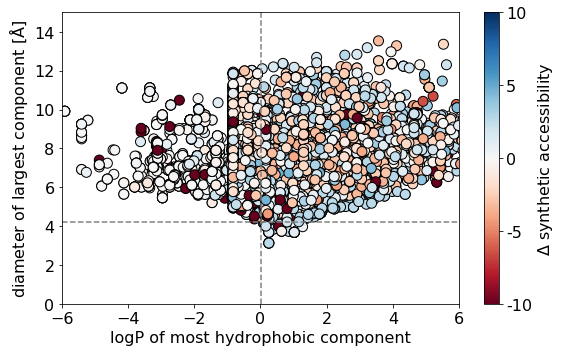

In [82]:
# plot max component size vs synthetic accessibility vs logP
rs_size_vs_SA_vs_logP(output_dir=search_output_dir,
                      size_thresh=size_thresh,
                      DF=data_DF,
                      plot_suffix=plot_suffix)

error loading:
/home/atarzia/psp/screening_results/new_reactions/sRS-3_6_1_53-BRENDA-BR8.gpkl


SystemExit: 

/home/atarzia/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


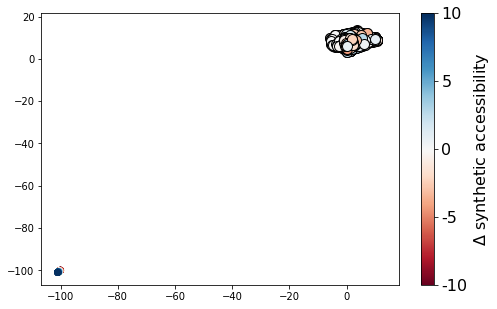

In [28]:
# plot max component size vs synthetic accessibility vs logP
rs_size_vs_SA_vs_logP(output_dir=search_output_dir,
                      size_thresh=size_thresh,
                      generator=yield_rxn_syst(search_output_dir),
                      plot_suffix=plot_suffix)

In [ ]:
# plot max component size vs complexity vs XlogP
rs_size_vs_complexity_vs_XlogP(output_dir=search_output_dir,
                               size_thresh=size_thresh,
                               generator=yield_rxn_syst(search_output_dir),
                               plot_suffix=plot_suffix)

In [ ]:
# plot max component size vs SA score vs XlogP vs aliphatic index
rs_size_vs_SA_vs_XlogP_vs_aindex(output_dir=search_output_dir,
                                 size_thresh=size_thresh,
                                 generator=yield_rxn_syst(search_output_dir),
                                 plot_suffix=plot_suffix)

In [ ]:
generator = yield_rxn_syst(search_output_dir)
# collect rxn syst data
max_sizes = []
reaction_reported = []
# also plot the number of new reactions with pI < thresh
# max_sizes_pI = []
# iterate over reaction system files
for rs in generator:
    if rs.skip_rxn is True:
        continue
    unique, reaction_reported = check_rxn_unique(reaction_reported, rs)
    if unique is False:
        continue
    try:
        if rs.max_comp_size > 0:
            max_sizes.append(rs.max_comp_size)
            # if rs.seed_MOF is True:
            #     max_sizes_pI.append(rs.max_comp_size)
    except AttributeError:
        pass
    
max_sizes = np.asarray(max_sizes)
# max_sizes_pI = np.asarray(max_sizes_pI)
counts = []
# counts_pI = []
threshs = np.arange(0.1, 21, 0.5)
for thr in threshs:
    count_above = len(max_sizes[max_sizes < thr])
    counts.append(count_above)
    # count_above_pI = len(max_sizes_pI[max_sizes_pI < thr])
    # counts_pI.append(count_above_pI)

In [ ]:
# do plot
fig, ax = plt.subplots(figsize=(8, 5))
max_sizes = []
reaction_reported = []


ax.plot(threshs, counts, alpha=1.0,
        label='max component < threshold',
        color='k', marker='o')

ax.legend(loc=4, fontsize=12)

ax.axvline(x=size_thresh, c='gray', linestyle='--')

# plot possible region of ZIF pore limiting diameters from
# Materials Project
ax.axvspan(3.7, 16, facecolor='#2ca02c', alpha=0.2)

define_standard_plot(ax,
                     title='',
                     xtitle='diffusion threshold [$\mathrm{\AA}$]',
                     ytitle='# reactions',
                     xlim=(0, 20),
                     ylim=(0, max(counts)+10))
fig.tight_layout()
fig.savefig(output_dir+"size_threshold_"+plot_suffix+".pdf", dpi=720,
            bbox_inches='tight')

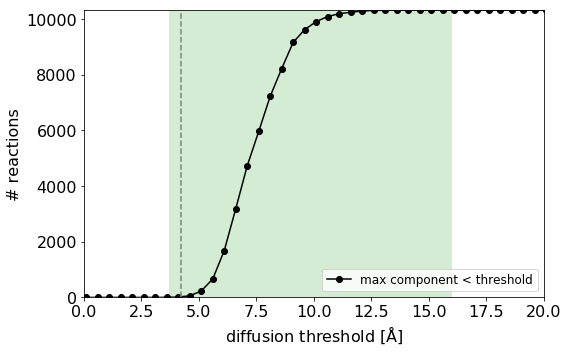

In [83]:
# plot number of new reactions as a function of size threshold
rs_number_rxns_vs_size(output_dir=search_output_dir,
                       size_thresh=size_thresh,
                       generator=yield_rxn_syst(search_output_dir),
                       plot_suffix=plot_suffix)

### RS distributions

In [ ]:
# plot a distribution of the number of reactnts in each reaction system
rs_dist_no_reactants(output_dir=search_output_dir,
                     generator=yield_rxn_syst(search_output_dir),
                     plot_suffix=plot_suffix)

In [ ]:
# plot a distribution of the number of products in each reaction system
rs_dist_no_products(output_dir=search_output_dir,
                    generator=yield_rxn_syst(search_output_dir),
                    plot_suffix=plot_suffix)

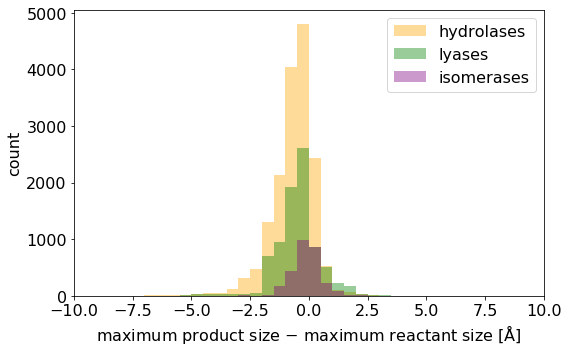

In [6]:
# plot a distribution of the change in molecule size due to reaction
rs_dist_delta_size(output_dir=search_output_dir,
                   generator=yield_rxn_syst(search_output_dir),
                   plot_suffix=plot_suffix)

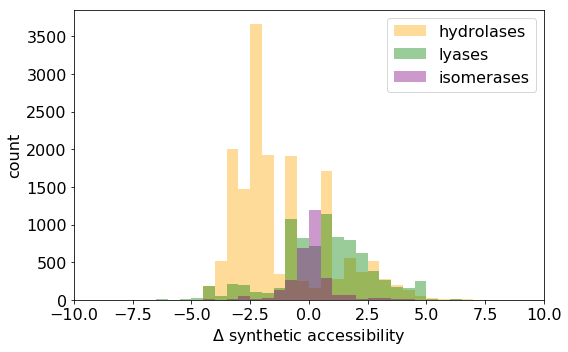

In [7]:
# plot a distribution of the change in synthetic accesibility
rs_dist_delta_SA(output_dir=search_output_dir,
                 generator=yield_rxn_syst(search_output_dir),
                 plot_suffix=plot_suffix)

In [ ]:
# plot a distribution of the change in complexity
rs_dist_delta_complexity(output_dir=search_output_dir,
                         generator=yield_rxn_syst(search_output_dir),
                         plot_suffix=plot_suffix)

#### plot distributions of protein sequence properties

In [ ]:
rs_dist_GRAVY(output_dir=search_output_dir,
              generator=yield_rxn_syst(search_output_dir),
              plot_suffix=plot_suffix)

In [ ]:
rs_dist_I_index(output_dir=search_output_dir,
                generator=yield_rxn_syst(search_output_dir),
                plot_suffix=plot_suffix)

In [ ]:
rs_dist_A_index(output_dir=search_output_dir,
                generator=yield_rxn_syst(search_output_dir),
                plot_suffix=plot_suffix)

In [ ]:
rs_dist_pI(output_dir=search_output_dir,
           generator=yield_rxn_syst(search_output_dir),
           plot_suffix=plot_suffix)

### Molecule property plots

### Molecule distributions